# Spleeter's Models' Performance Review for Integration with Audacity

###                                                                                 -Devesh Kashyap

# Installing Dependencies

In [ ]:
%%bash
pip install pydub
pip install numpy
pip install scipy
pip install pandas
pip install plotnine
conda install -c conda-forge ffmpeg libsndfile
pip install spleeter

# 1) Generating testing samples from stereo music track

### If you want to replicate the examples shown below for some other music track,replace "test.wav" file and update the paths 

In [1]:
from pydub import AudioSegment

In [2]:
audio_file="test.wav"
audio=AudioSegment.from_wav(audio_file)
time_stamps=[20,40,60,80,100,120,140,160,180,200,220,240,260,280,300] #audio split durations

start=0
for idx,t in enumerate(time_stamps):
    if idx==len(time_stamps):
        break
        
    end= int(t*1000)
    print("split at[ {} : {} ] secs.".format(start/1000,end/1000))
    audio_chunk=audio[start:end]
    audio_chunk.export("output/audio{}.wav".format(end/1000),format="wav")
    

split at[ 0.0 : 20.0 ] secs.
split at[ 0.0 : 40.0 ] secs.
split at[ 0.0 : 60.0 ] secs.
split at[ 0.0 : 80.0 ] secs.
split at[ 0.0 : 100.0 ] secs.
split at[ 0.0 : 120.0 ] secs.
split at[ 0.0 : 140.0 ] secs.
split at[ 0.0 : 160.0 ] secs.
split at[ 0.0 : 180.0 ] secs.
split at[ 0.0 : 200.0 ] secs.
split at[ 0.0 : 220.0 ] secs.
split at[ 0.0 : 240.0 ] secs.
split at[ 0.0 : 260.0 ] secs.
split at[ 0.0 : 280.0 ] secs.
split at[ 0.0 : 300.0 ] secs.


In [3]:
%%bash
cd output
ls #the split audio tracks are shown below from "audio100.0.wav" to "audio90.0.wav"

audio100.0
audio100.0.wav
audio120.0
audio120.0.wav
audio140.0
audio140.0.wav
audio160.0
audio160.0.wav
audio180.0
audio180.0.wav
audio20.0
audio200.0
audio200.0.wav
audio20.0.wav
audio220.0
audio220.0.wav
audio240.0
audio240.0.wav
audio260.0
audio260.0.wav
audio280.0
audio280.0.wav
audio300.0
audio300.0.wav
audio40.0
audio40.0.wav
audio60.0
audio60.0.wav
audio80.0
audio80.0.wav


# 2) Testing the models

# Testing the 2 Stems Separation Model

## *Initializing the model & trial test of single sample

In [4]:
import time

start =time.time()

!python -m spleeter separate -p spleeter:2stems -o output audio40.0.wav

end=time.time()

print("{} secs.".format(end-start))


INFO:spleeter:File output/audio40.0/vocals.wav written succesfully
INFO:spleeter:File output/audio40.0/accompaniment.wav written succesfully
13.219518423080444 secs.


## *Batch testing of all samples

In [5]:
%%bash
SOURCE_DIR=/home/devesh/output
files=(
   "$SOURCE_DIR"/*.wav
)
# printf '%s\n' "${files[@]/}"
for clip in ${files[*]}
    do
        START_TIME=$SECONDS
        python -m spleeter separate -p spleeter:2stems -o output $clip
        ELAPSED_TIME=$(($SECONDS - $START_TIME))
        echo "$(($ELAPSED_TIME/60)) min $(($ELAPSED_TIME%60)) sec" 
        echo "${clip[@]##*o}" "$(($ELAPSED_TIME))">>2StemTime.txt
     done

INFO:spleeter:File output/audio100.0/vocals.wav written succesfully
INFO:spleeter:File output/audio100.0/accompaniment.wav written succesfully
0 min 18 sec
INFO:spleeter:File output/audio120.0/vocals.wav written succesfully
INFO:spleeter:File output/audio120.0/accompaniment.wav written succesfully
0 min 20 sec
INFO:spleeter:File output/audio140.0/vocals.wav written succesfully
INFO:spleeter:File output/audio140.0/accompaniment.wav written succesfully
0 min 20 sec
INFO:spleeter:File output/audio160.0/vocals.wav written succesfully
INFO:spleeter:File output/audio160.0/accompaniment.wav written succesfully
0 min 23 sec
INFO:spleeter:File output/audio180.0/vocals.wav written succesfully
INFO:spleeter:File output/audio180.0/accompaniment.wav written succesfully
0 min 24 sec
INFO:spleeter:File output/audio200.0/vocals.wav written succesfully
INFO:spleeter:File output/audio200.0/accompaniment.wav written succesfully
0 min 26 sec
INFO:spleeter:File output/audio20.0/vocals.wav written succesful

# Testing the 4 Stems Separation Model

## *Initializing the model and trial test of single sample

In [6]:
import time

start =time.time()

!python -m spleeter separate -p spleeter:4stems -o output audio100.0.wav
mizkif 
end=time.time()

print("{} secs.".format(end-start))


INFO:spleeter:File output/audio100.0/vocals.wav written succesfully
INFO:spleeter:File output/audio100.0/drums.wav written succesfully
INFO:spleeter:File output/audio100.0/bass.wav written succesfully
INFO:spleeter:File output/audio100.0/other.wav written succesfully
29.682589054107666 secs.


## *Batch testing of all samples

In [7]:
%%bash
SOURCE_DIR=/home/devesh/output
files=(
   "$SOURCE_DIR"/*.wav
)
# printf '%s\n' "${files[@]/}"
for clip in ${files[*]}
    do
        START_TIME=$SECONDS
        python -m spleeter separate -p spleeter:4stems -o output $clip
        ELAPSED_TIME=$(($SECONDS - $START_TIME))
        echo "$(($ELAPSED_TIME/60)) min $(($ELAPSED_TIME%60)) sec" 
        echo "${clip[@]##*o}" "$(($ELAPSED_TIME))">>4StemTime.txt
     done

INFO:spleeter:File output/audio100.0/vocals.wav written succesfully
INFO:spleeter:File output/audio100.0/drums.wav written succesfully
INFO:spleeter:File output/audio100.0/bass.wav written succesfully
INFO:spleeter:File output/audio100.0/other.wav written succesfully
0 min 28 sec
INFO:spleeter:File output/audio120.0/vocals.wav written succesfully
INFO:spleeter:File output/audio120.0/drums.wav written succesfully
INFO:spleeter:File output/audio120.0/bass.wav written succesfully
INFO:spleeter:File output/audio120.0/other.wav written succesfully
0 min 32 sec
INFO:spleeter:File output/audio140.0/vocals.wav written succesfully
INFO:spleeter:File output/audio140.0/drums.wav written succesfully
INFO:spleeter:File output/audio140.0/bass.wav written succesfully
INFO:spleeter:File output/audio140.0/other.wav written succesfully
0 min 33 sec
INFO:spleeter:File output/audio160.0/vocals.wav written succesfully
INFO:spleeter:File output/audio160.0/drums.wav written succesfully
INFO:spleeter:File out

# Testing the 5 Stems Separation Model

## *Initializing the model & trial test of single sample

In [8]:
import time

start =time.time()

!python -m spleeter separate -p spleeter:5stems -o output audio20.0.wav

end=time.time()

print("{} secs.".format(end-start))


INFO:spleeter:File output/audio20.0/vocals.wav written succesfully
INFO:spleeter:File output/audio20.0/drums.wav written succesfully
INFO:spleeter:File output/audio20.0/bass.wav written succesfully
INFO:spleeter:File output/audio20.0/piano.wav written succesfully
INFO:spleeter:File output/audio20.0/other.wav written succesfully
22.307237148284912 secs.


## *Batch testing of all samples

In [9]:
%%bash
SOURCE_DIR=/home/devesh/output
files=(
   "$SOURCE_DIR"/*.wav
)
# printf '%s\n' "${files[@]/}"
for clip in ${files[*]}
    do
        START_TIME=$SECONDS
        python -m spleeter separate -p spleeter:5stems -o output $clip
        ELAPSED_TIME=$(($SECONDS - $START_TIME))
        echo "$(($ELAPSED_TIME/60)) min $(($ELAPSED_TIME%60)) sec" 
        echo "${clip[@]##*o}" "$(($ELAPSED_TIME))">>5StemTime.txt
     done

INFO:spleeter:File output/audio100.0/vocals.wav written succesfully
INFO:spleeter:File output/audio100.0/piano.wav written succesfully
INFO:spleeter:File output/audio100.0/drums.wav written succesfully
INFO:spleeter:File output/audio100.0/bass.wav written succesfully
INFO:spleeter:File output/audio100.0/other.wav written succesfully
0 min 35 sec
INFO:spleeter:File output/audio120.0/vocals.wav written succesfully
INFO:spleeter:File output/audio120.0/piano.wav written succesfully
INFO:spleeter:File output/audio120.0/drums.wav written succesfully
INFO:spleeter:File output/audio120.0/other.wav written succesfully
INFO:spleeter:File output/audio120.0/bass.wav written succesfully
0 min 38 sec
INFO:spleeter:File output/audio140.0/vocals.wav written succesfully
INFO:spleeter:File output/audio140.0/piano.wav written succesfully
INFO:spleeter:File output/audio140.0/drums.wav written succesfully
INFO:spleeter:File output/audio140.0/other.wav written succesfully
INFO:spleeter:File output/audio140.

# 3) Data Visualization

In [10]:
%%bash 
 cat 2StemTime.txt
 echo
cat 5StemTime.txt
echo
cat 5StemTime.txt

col1 col4
col1 col4
100.0.wav 19
120.0.wav 20
140.0.wav 20
160.0.wav 23
180.0.wav 24
200.0.wav 26
20.0.wav 11
220.0.wav 28
240.0.wav 30
260.0.wav 32
280.0.wav 30
300.0.wav 33
40.0.wav 16
60.0.wav 15
80.0.wav 16
100.0.wav 9
120.0.wav 8
140.0.wav 8
160.0.wav 8
180.0.wav 8
200.0.wav 8
20.0.wav 9
220.0.wav 9
240.0.wav 8
260.0.wav 9
280.0.wav 8
300.0.wav 8
40.0.wav 8
60.0.wav 8
80.0.wav 8
100.0.wav 18
120.0.wav 20
140.0.wav 20
160.0.wav 23
180.0.wav 24
200.0.wav 26
20.0.wav 12
220.0.wav 28
240.0.wav 30
260.0.wav 31
280.0.wav 29
300.0.wav 30
40.0.wav 13
60.0.wav 14
80.0.wav 16

col1 col3
col1 col3
100.0.wav 37
120.0.wav 45
140.0.wav 49
160.0.wav 64
180.0.wav 71
200.0.wav 64
20.0.wav 57
220.0.wav 29
240.0.wav 64
260.0.wav 84
280.0.wav 62
300.0.wav 62
40.0.wav 61
60.0.wav 27
80.0.wav 32
100.0.wav 13
120.0.wav 40
140.0.wav 53
160.0.wav 47
180.0.wav 69
200.0.wav 77
20.0.wav 39
220.0.wav 73
240.0.wav 103
100.0.wav 35
120.0.wav 38
140.0.wav 41
160.0.wav 45
180.0.wav 52
200.0.wav 54
20.0.wav 20
220

In [16]:
# Update the paths to run the visualization

my_file = open("/home/devesh/5StemTime.txt","r")
file_content = my_file.read()
my_file = open("/home/devesh/5StemTime.txt","w")
my_file.seek(0)
my_file.write("col1 col3\n" + file_content)
my_file.close()
my_file = open("/home/devesh/2StemTime.txt","r")
file_content = my_file.read()
my_file = open("/home/devesh/2StemTime.txt","w")
my_file.seek(0)
my_file.write("col1 col4\n" + file_content)
my_file.close()
my_file = open("/home/devesh/4StemTime.txt","r")
file_content = my_file.read()
my_file = open("/home/devesh/4StemTime.txt","w")
my_file.seek(0)
my_file.write("col1 col2\n" + file_content)
my_file.close()

In [17]:
import pandas as pd
import numpy as np
dftemp = pd.read_csv("/home/devesh/4StemTime.txt",delimiter=" ")
dftemp.to_csv("/home/devesh/4StemTime.csv")
dftemp = pd.read_csv("/home/devesh/5StemTime.txt",delimiter=" ")
dftemp.to_csv("/home/devesh/5StemTime.csv")
dftemp = pd.read_csv("/home/devesh/2StemTime.txt",delimiter=" ")
dftemp.to_csv("/home/devesh/2StemTime.csv")
df1 = pd.read_csv("/home/devesh/4StemTime.csv")
df2 = pd.read_csv("/home/devesh/2StemTime.csv")
df3 = pd.read_csv("/home/devesh/5StemTime.csv")

In [18]:
df1['col3'] = df3['col3']
df1['col4'] = df2['col4']

In [19]:
temp = np.array(df1["col1"])
temp1 = []
for _ in range (0,len(temp)):
    var = temp[_].split(".wav")
    temp1.append(float(var[0]))
df1["x"] = temp1

In [20]:
df1.sort_values('x')

,Unnamed: 0,col1,col2,col3,col4,x
23,23,20.0.wav,17,103,8,20.0
6,6,20.0.wav,34,57,11,20.0
29,29,40.0.wav,24,54,8,40.0
12,12,40.0.wav,46,61,16,40.0
30,30,60.0.wav,23,20,18,60.0
13,13,60.0.wav,23,27,15,60.0
31,31,80.0.wav,25,57,20,80.0
14,14,80.0.wav,25,32,16,80.0
17,17,100.0.wav,28,53,8,100.0
0,0,100.0.wav,32,37,19,100.0


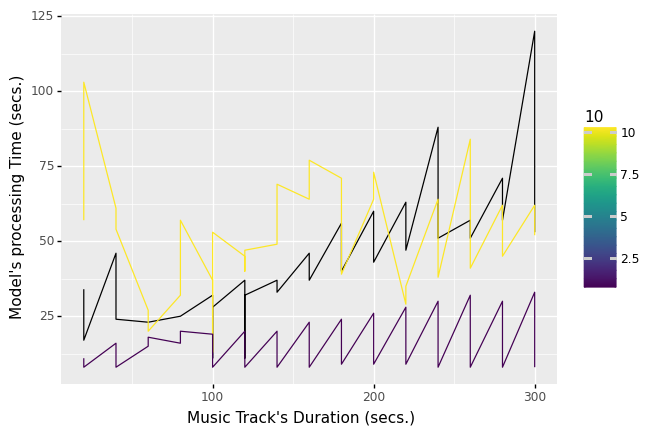

<ggplot: (8729656870497)>

In [35]:
from plotnine import ggplot,aes,geom_point,geom_line,geom_polygon,xlab,ylab
ggplot(df1)+geom_line(mapping = aes(x = df1['x'],y = df1['col2']))+geom_line(mapping = aes(x = df1['x'],
y = df1['col3'],color=10))+geom_line(mapping = aes(x = df1['x'],
y = df1['col4'],color=1))+xlab("Music Track's Duration (secs.)")+ylab("Model's processing Time (secs.)")

# Inference

Although, Spleeter is widely considered the best in source separation ,there is still some room for improvement by optimizing the models to decrease splitting time.



As seen from the above example,there is a huge differnce between the time taken to process an audio track in Spleeter, and the import/export time in Audacity.



However,the slightly large processing time of Spleeter is hugely compensated by the quality and acuracy of the split audio stems.